In [1]:
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [2]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [3]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640064    
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 644,289
Trainable params: 644,289
Non-trainable params: 0
_________________________________________________________________


In [6]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/10
30/30 [==============================] - 4s 94ms/step - loss: 0.4742 - accuracy: 0.7796 - val_loss: 0.4145 - val_accuracy: 0.8196
Epoch 2/10
30/30 [==============================] - 2s 76ms/step - loss: 0.2544 - accuracy: 0.9058 - val_loss: 0.3222 - val_accuracy: 0.8696
Epoch 3/10
30/30 [==============================] - 2s 75ms/step - loss: 0.1970 - accuracy: 0.9263 - val_loss: 0.3152 - val_accuracy: 0.8761
Epoch 4/10
30/30 [==============================] - 2s 79ms/step - loss: 0.1364 - accuracy: 0.9517 - val_loss: 0.3394 - val_accuracy: 0.8747
Epoch 5/10
30/30 [==============================] - 4s 116ms/step - loss: 0.1083 - accuracy: 0.9619 - val_loss: 0.3904 - val_accuracy: 0.8698
Epoch 6/10
30/30 [==============================] - 2s 76ms/step - loss: 0.0938 - accuracy: 0.9683 - val_loss: 0.3647 - val_accuracy: 0.8771
Epoch 7/10
30/30 [==============================] - 2s 79ms/step - loss: 0.0659 - accuracy: 0.9800 - val_loss: 0.3933 - val_accuracy: 0.8804
Epoch 8/10
3

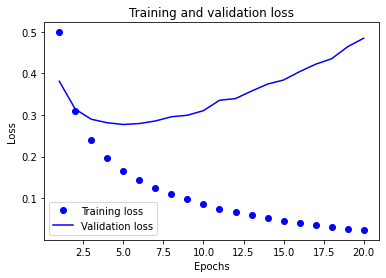

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss") 
plt.plot(epochs, val_loss_values, "b", label="Validation loss") 
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

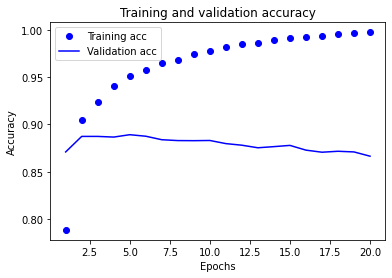

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.5322 - accuracy: 0.8517


[0.5322110056877136, 0.8516799807548523]